In [66]:
import glob
import json
import os
import sys
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from common import *

In [91]:
def get_pid(path):
    return int(re.sub(r'(\d+)\.pose\.json', r'\1', os.path.basename(path)))
    
def load_results(solution_dir):
    paths = []
    for f in os.listdir(solution_dir):
        if f.endswith('.pose.json'):
            paths.append(os.path.join(solution_dir, f))
    print(f'found {len(paths)} files')
    
    rows = []
    for path in paths:
        with open(path) as fi:
            j = json.load(fi)
        row = {
            'problem_id': get_pid(path),
            'solver': j['meta']['solver'],
        }
        for key, value in j['meta']['parameters'].items():
            row['p.' + key] = value
        rows.append(row)
    df = pd.DataFrame(rows)
    return df

def analyze(df):
    solvers = df.solver.unique()
    params = [c for c in df.columns if c.startswith('p.')]
    print(solvers)
    print(params)
    
    for solver in solvers:
        fig, ax = plt.subplots(len(params), 1, figsize=(8, 2 * len(params)))
        sub_df = df[df.solver == solver]
        
        for iparam, p in enumerate(params):
            data = sub_df[p].values.astype(np.float64)
            try:
                sns.distplot(data, ax=ax[iparam], rug=True, hist=True, label='UW')
            except:
                sns.distplot(data, ax=ax[iparam], rug=True, hist=True, label='UW', kde_kws={'bw':0.1})
            ax[iparam].set_title(p)
    
    fig.tight_layout()
    plt.show()

In [92]:
df = load_results(r'C:\Users\tomato\proj\ICFPC2021\icfpc2021\solutions\OptunaAnnealingSolver')
df

found 88 files


,problem_id,solver,p.initialize_pose_by_hole,p.T0,p.T1,p.single_small_change_max_delta,p.shift_max_delta,p.slight_rotate_max_deg,p.vote_pow,p.slide_protrusion_max_delta,...,p.slight_rotate_probability,p.shift_probability,p.hop_grid_probability,p.flip_probability,p.slide_protrusion_probability,p.protrusion_cost_coefficient0,p.protrusion_cost_coefficient1,p.deformation_cost_coefficient,p.dislikes_cost_coefficient,p.prohibit_unfeasible_after_feasible
0,1,OptunaAnnealingSolver,0,1.321280,0.015131,2,2,4.042200,4.633395,1.936584,...,0.969678,0.611136,0.826569,0.962704,0.237180,7.817286,0.001108,32.652018,0.007908,0
1,10,OptunaAnnealingSolver,0,4.305281,0.054775,1,1,1.916847,3.133056,2.865793,...,0.067411,0.874184,0.538170,0.234677,0.340263,0.975748,0.012417,7.773778,0.083214,0
2,100,OptunaAnnealingSolver,0,2.778957,0.005694,2,2,4.333475,3.269576,2.811758,...,0.065251,0.864746,0.982876,0.026542,0.477288,1.127698,0.003347,56.559889,0.001155,0
3,101,OptunaAnnealingSolver,0,2.800577,0.006269,3,3,3.213128,4.851312,1.698302,...,0.517176,0.487376,0.698464,0.052765,0.552644,0.500990,0.045250,9.932973,0.000664,0
4,102,OptunaAnnealingSolver,0,1.656830,0.001190,1,3,4.995502,3.415600,1.237689,...,0.973198,0.058712,0.648345,0.531868,0.039884,1.095039,0.012660,15.807852,0.000120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,95,OptunaAnnealingSolver,0,1.150482,0.005245,2,1,1.248523,3.812201,1.172825,...,0.532665,0.747350,0.146825,0.998347,0.974575,2.602310,0.028936,3.642870,0.002084,0
84,96,OptunaAnnealingSolver,0,11.529216,0.012320,1,1,3.516825,4.638408,2.958027,...,0.116420,0.807606,0.030060,0.147462,0.496749,5.598071,0.006580,6.524097,0.001710,0
85,97,OptunaAnnealingSolver,0,4.426683,0.001422,3,3,1.807394,3.636800,2.604570,...,0.069358,0.263001,0.411394,0.593550,0.700705,0.721316,0.028410,26.402948,0.000001,0
86,98,OptunaAnnealingSolver,0,3.800468,0.017161,3,2,4.393767,4.880911,1.127762,...,0.878077,0.975933,0.019390,0.676633,0.241089,3.073175,0.046762,55.111035,0.001659,0


['OptunaAnnealingSolver']
['p.initialize_pose_by_hole', 'p.T0', 'p.T1', 'p.single_small_change_max_delta', 'p.shift_max_delta', 'p.slight_rotate_max_deg', 'p.vote_pow', 'p.slide_protrusion_max_delta', 'p.single_small_change_probability', 'p.slight_rotate_probability', 'p.shift_probability', 'p.hop_grid_probability', 'p.flip_probability', 'p.slide_protrusion_probability', 'p.protrusion_cost_coefficient0', 'p.protrusion_cost_coefficient1', 'p.deformation_cost_coefficient', 'p.dislikes_cost_coefficient', 'p.prohibit_unfeasible_after_feasible']


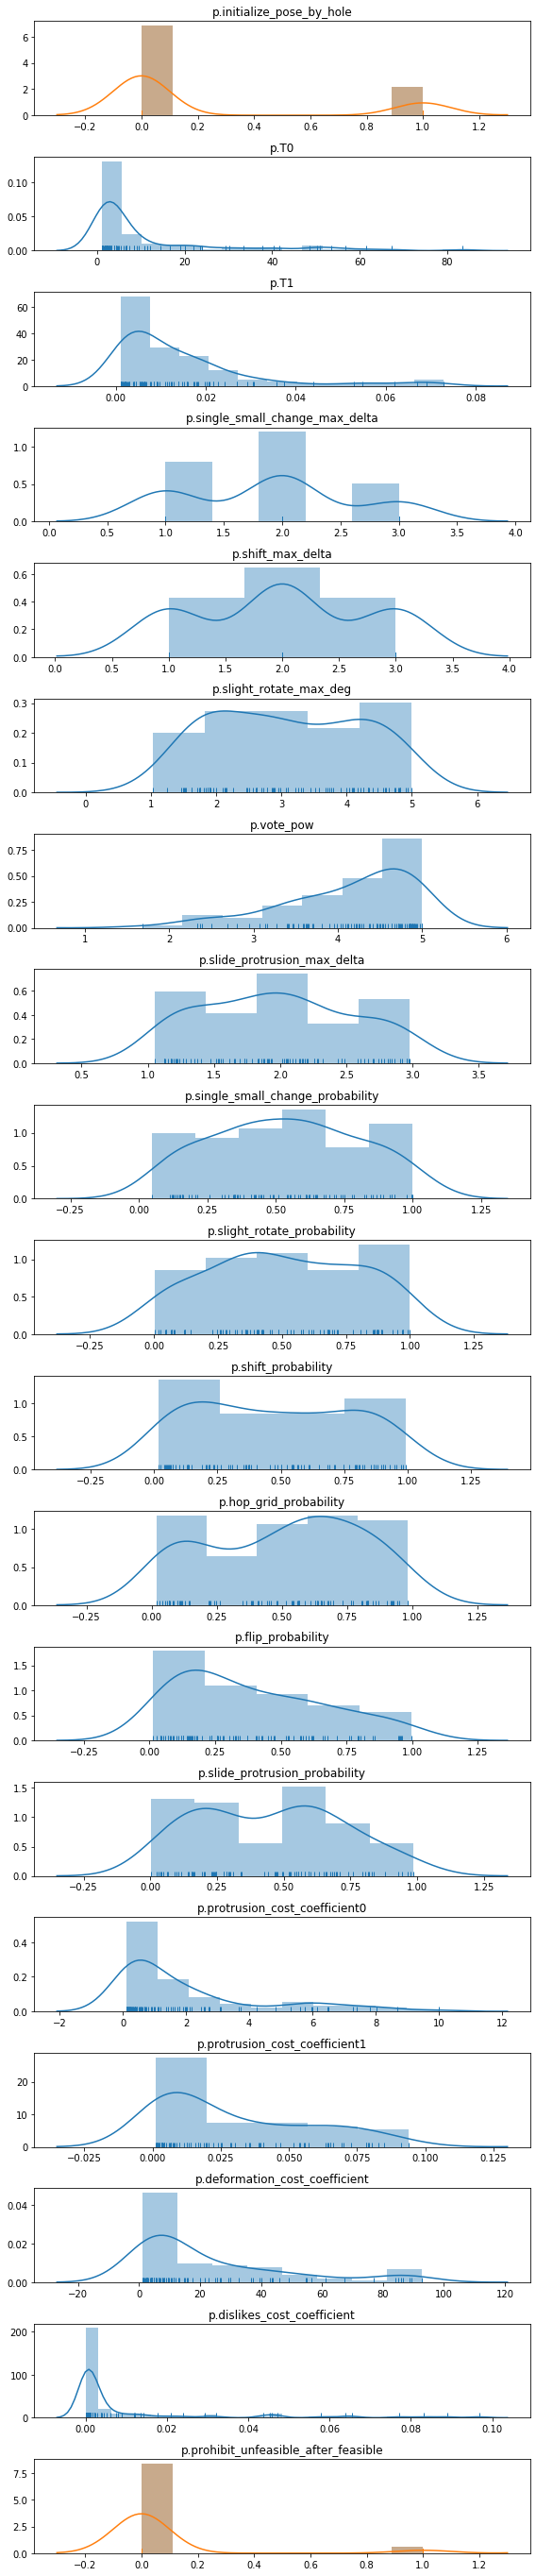

In [93]:
analyze(df)